In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# from hurstexponent.hurst_exponent import HurstEstimator

In [2]:
from liquidity.util.data_util import get_series_acf, get_nonlinear_acf

In [8]:
# from powerlaw-function import Fit
import importlib
pf = importlib.import_module("powerlaw_function")

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
ACF_RANGE = 1001

# Load signs data

In [ ]:
tsla_df_mo = pd.read_csv('../../../../data/market_orders/TSLA-2016-R1.csv', header=0,index_col=0)
msft_df_mo = pd.read_csv('../../../../data/market_orders/MSFT-2016-R1.csv', header=0, index_col=0)
amzn_df_mo = pd.read_csv('../../../../data/market_orders/AMZN-2016-R1.csv', header=0, index_col=0)
nflx_df_mo = pd.read_csv('../../../../data/market_orders/NFLX-2016-R1.csv', header=0, index_col=0)
ebay_df_mo = pd.read_csv('../../../../data/market_orders/EBAY-2016-R1.csv', header=0, index_col=0)
appl_df_mo = pd.read_csv('../../../../data/market_orders/APPL-2016-R1.csv', header=0, index_col=0)

In [ ]:
# Construct linear ACF series
linear_signs_acf_tsla = get_series_acf(tsla_df_mo['trade_sign'], ACF_RANGE)[1:]
linear_signs_acf_msft = get_series_acf(msft_df_mo['trade_sign'], ACF_RANGE)[1:]
linear_signs_acf_amzn = get_series_acf(amzn_df_mo['trade_sign'], ACF_RANGE)[1:]
linear_signs_acf_nflx = get_series_acf(nflx_df_mo['trade_sign'], ACF_RANGE)[1:]
linear_signs_acf_ebay = get_series_acf(ebay_df_mo['trade_sign'], ACF_RANGE)[1:]
linear_signs_acf_appl = get_series_acf(appl_df_mo['trade_sign'], ACF_RANGE)[1:]

# Construct nonlinear ACF series
nonlinear_signs_acf_tsla = get_nonlinear_acf(tsla_df_mo['trade_sign'], ACF_RANGE, method='kendall')[1:]
nonlinear_signs_acf_msft = get_nonlinear_acf(msft_df_mo['trade_sign'], ACF_RANGE, method='kendall')[1:]
nonlinear_signs_acf_amzn = get_nonlinear_acf(amzn_df_mo['trade_sign'], ACF_RANGE, method='kendall')[1:]
nonlinear_signs_acf_nflx = get_nonlinear_acf(nflx_df_mo['trade_sign'], ACF_RANGE, method='kendall')[1:]
nonlinear_signs_acf_ebay = get_nonlinear_acf(ebay_df_mo['trade_sign'], ACF_RANGE, method='kendall')[1:]
nonlinear_signs_acf_appl = get_nonlinear_acf(appl_df_mo['trade_sign'], ACF_RANGE, method='kendall')[1:]


In [ ]:
linear_signs_acf_tsla[:10]

In [ ]:
nonlinear_signs_acf_tsla[:10]

# 1. Linear vs nonlinear ACF

It seems that both Pearson and Kendall correlation methods end up with very similar results. This could be due to one of the following:
<br></br>

1. Linear Relationship: The relationship between your time series and its lagged versions could be linear, or at least closely linear. Pearson's correlation measures linear association, so if the underlying relationship is linear, both Kendall and Pearson will capture this association similarly.
<br></br>

2. Monotonic Relationship: Kendall rank correlation measures monotonic relationships, not necessarily non-linear relationships. A monotonic relationship is one where the variables tend to move in the same direction, but not necessarily at a constant rate. If your series data has a monotonic relationship, Kendall and Pearson coefficients can indeed be similar.
<br></br>

3. Lack of Non-linear Association: If our data doesn't contain significant non-linear patterns, both methods could end up providing similar results. The Kendall correlation would detect non-linear relationships if they exist, but if they don't, it would just mirror the results of the Pearson correlation. In this case, it's best to use Kendall in case a non-linear relation holds for some sample.

In [ ]:
linear_acfs = {
  'TSLA': linear_signs_acf_tsla,
  'MSFT': linear_signs_acf_msft,
  'AMZN': linear_signs_acf_amzn,
  'NFLX': linear_signs_acf_nflx,
  'EBAY': linear_signs_acf_ebay,
  'APPL': linear_signs_acf_appl
}

nonlinear_acfs = {
  'TSLA': nonlinear_signs_acf_tsla,
  'MSFT': nonlinear_signs_acf_msft,
  'AMZN': nonlinear_signs_acf_amzn,
  'NFLX': nonlinear_signs_acf_nflx,
  'EBAY': nonlinear_signs_acf_ebay,
  'APPL': nonlinear_signs_acf_appl
}

In [ ]:
# Save data for lazy loading
# pickle.dump(linear_acfs, open("linear_acfs.pkl", "wb"))
# pickle.dump(nonlinear_acfs, open("nonlinear_acfs.pkl", "wb"))

In [14]:
linear_acfs = pickle.load(open("linear_acfs.pkl", "rb"))
nonlinear_acfs = pickle.load(open("nonlinear_acfs.pkl", "rb"))

In [15]:
def plot_acf_difference(stock_name, linear_acfs, nonlinear_acfs):

    linear_acf = linear_acfs[stock_name]
    nonlinear_acf = nonlinear_acfs[stock_name]

    plt.figure(figsize=(14, 4))

    # Original scale
    plt.subplot(1, 3, 1)
    plt.plot(range(1, ACF_RANGE), linear_acf, label='Linear')
    plt.plot(range(1, ACF_RANGE), nonlinear_acf, label='Nonlinear', color='green')
    plt.grid(False)
    plt.legend(frameon=False)

    # log scale
    plt.subplot(1, 3, 2)
    plt.plot(range(1, ACF_RANGE), linear_acf, label='Linear')
    plt.plot(range(1, ACF_RANGE), nonlinear_acf, label='Nonlinear', color='green')
    plt.grid(False)
    plt.loglog()
    plt.legend(frameon=False)
    plt.suptitle(f'Linear vs nonlinear ACF across lags for {stock_name} MO signs')

    # Difference
    plt.subplot(1, 3, 3)
    difference = [x1-x2 for x1, x2 in zip(linear_acf, nonlinear_acf)]
    plt.plot(range(1, ACF_RANGE), difference, label="Difference", color='red')
    plt.legend(frameon=False)
    plt.grid(False)
    plt.suptitle(f'Linear vs nonlinear ACF across lags for {stock_name} MO signs')

    print(f'{stock_name} Max difference: {max(difference)}')

    plt.show()


TSLA Max difference: 1.504352198367087e-14


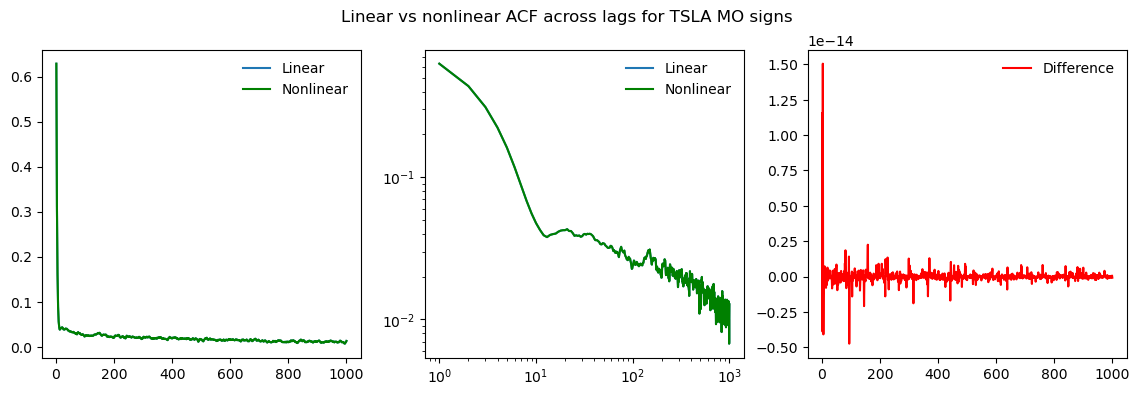

MSFT Max difference: 2.4980018054066022e-14


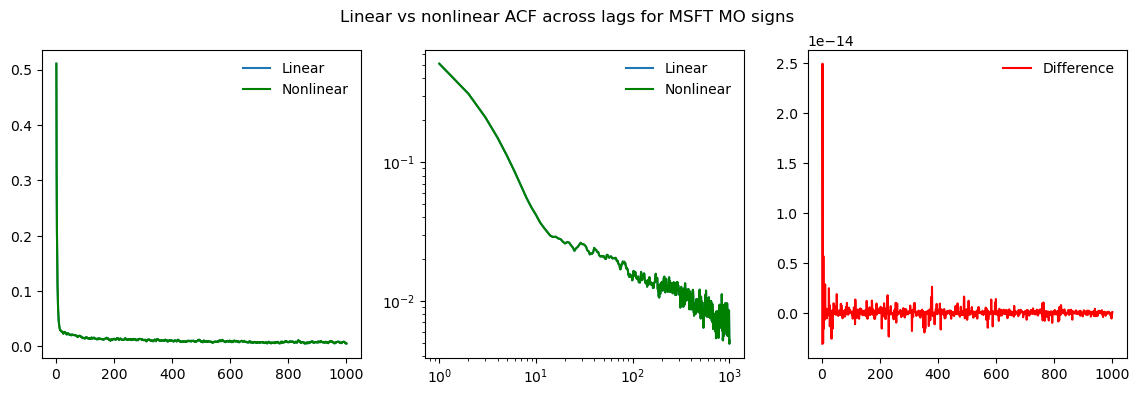

AMZN Max difference: 1.4183099139586375e-14


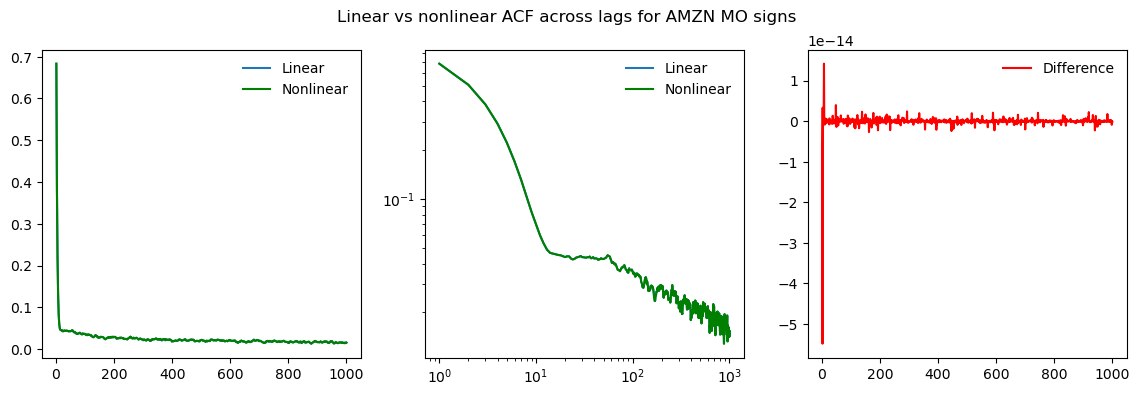

NFLX Max difference: 1.4432899320127035e-14


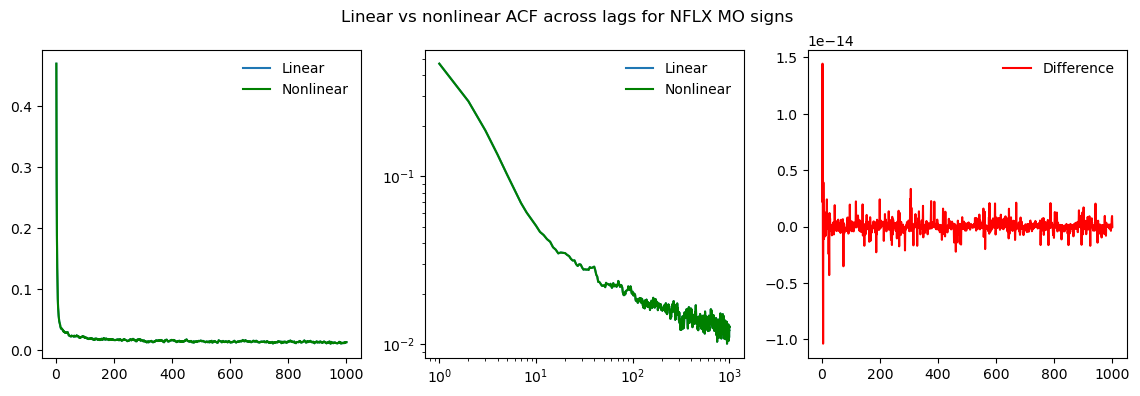

EBAY Max difference: 8.326672684688674e-15


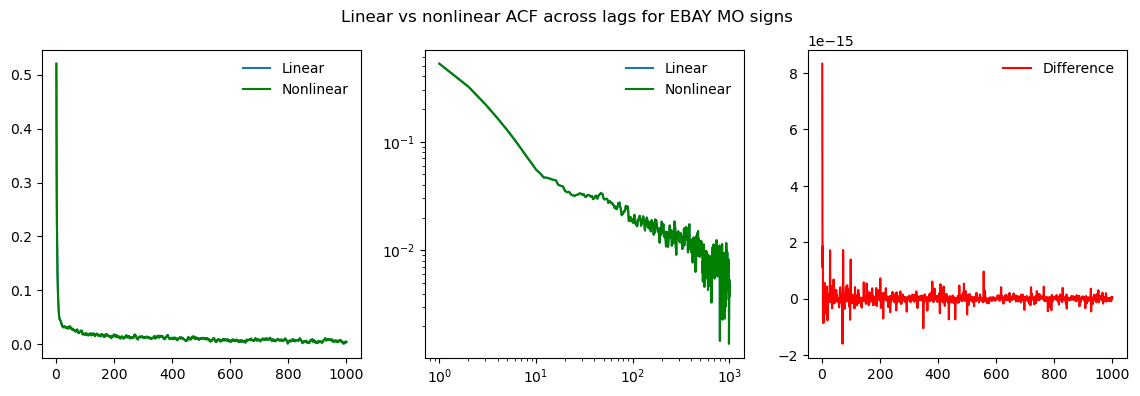

APPL Max difference: 6.293576770843856e-15


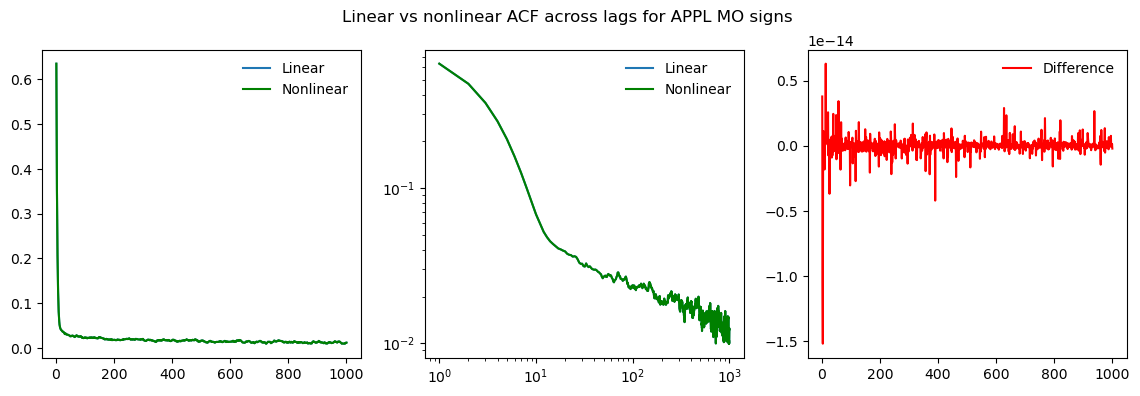

In [16]:
for stock_name in linear_acfs.keys():
    plot_acf_difference(stock_name, linear_acfs, nonlinear_acfs)

# 2. Stationarity Test

To test whether our time series are stationary, we perform an augmented Dickey-Fuller test on each series, which uses the following null and alternative hypotheses:

H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time. (There is at least one unit root)

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In [8]:
# ADF test
def print_ADF_test_results_for_series(sample, name: str, alpha=0.05):
    # Convert list to pandas Series if necessary
    if isinstance(sample, list):
        sample = pd.Series(sample)

    # Replace inf and -inf with nan
    sample.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop nan values
    sample.dropna(inplace=True)

    print(name)
    adf, p, usedlag, nobs, cvs, aic = adfuller(sample)
    adf_results_string = 'ADF: {:.2f}\np-value: {:.2f},\nN: {}, \ncritical values: {}'
    print(adf_results_string.format(adf, p, nobs, cvs))

    # Interpretation
    if p < alpha:
        print("We reject the null hypothesis at a significance level of {}.".format(alpha))
        print("The time series appears to be stationary.")
    else:
        print("We cannot reject the null hypothesis at a significance level of {}.".format(alpha))
        print("The time series appears to be non-stationary.")

    print('\n')

In [9]:
for stock, data in nonlinear_acfs.items():
    print_ADF_test_results_for_series(data, stock)

TSLA
ADF: -2.96
p-value: 0.04,
N: 991, 
critical values: {'1%': -3.4369658620871286, '5%': -2.8644609013346485, '10%': -2.56832523159495}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -4.93
p-value: 0.00,
N: 977, 
critical values: {'1%': -3.43706091543889, '5%': -2.8645028204932483, '10%': -2.568347558984588}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -2.63
p-value: 0.09,
N: 989, 
critical values: {'1%': -3.436979275944879, '5%': -2.8644668170148058, '10%': -2.5683283824496153}
We cannot reject the null hypothesis at a significance level of 0.05.
The time series appears to be non-stationary.


NFLX
ADF: -6.34
p-value: 0.00,
N: 981, 
critical values: {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBAY
ADF

# 3. Fitting power law functions

## 3.1. Data pre-processing

In [17]:
# Construct values for each dimension, x- and y-axis, of our function
def construct_xy(sample: pd.Series, name: str):
    print(name)
    x_values = list(range(1, len(sample) + 1))
    y_values = list(sample)

    if len(x_values) != len(y_values):
        print(f'Error: x_values and y_values are not of equal length for {name}')
        print(f'Length of x_values: {len(x_values)}, Length of y_values: {len(y_values)}')
        return None  # Return None in case of error

    # create a DataFrame
    xy_df = pd.DataFrame({
        'x_values': x_values,
        'y_values': y_values
    })

    return xy_df

In [18]:
stock_xy_values = {}

for stock, data in nonlinear_acfs.items():
    xy_df = construct_xy(data, stock)
    if xy_df is not None:  # Only add to dictionary if non-None values were returned
        stock_xy_values[stock] = xy_df

TSLA
MSFT
AMZN
NFLX
EBAY
APPL


In [19]:
stock_xy_values

{'TSLA':      x_values  y_values
 0           1  0.628648
 1           2  0.437240
 2           3  0.311367
 3           4  0.223277
 4           5  0.161733
 ..        ...       ...
 995       996  0.008639
 996       997  0.009675
 997       998  0.010112
 998       999  0.011184
 999      1000  0.012791
 
 [1000 rows x 2 columns],
 'MSFT':      x_values  y_values
 0           1  0.510814
 1           2  0.310548
 2           3  0.209667
 3           4  0.149901
 4           5  0.111349
 ..        ...       ...
 995       996  0.006277
 996       997  0.006033
 997       998  0.004981
 998       999  0.004927
 999      1000  0.005187
 
 [1000 rows x 2 columns],
 'AMZN':      x_values  y_values
 0           1  0.683298
 1           2  0.506028
 2           3  0.382829
 3           4  0.291492
 4           5  0.222388
 ..        ...       ...
 995       996  0.014148
 996       997  0.014691
 997       998  0.014324
 998       999  0.014772
 999      1000  0.015320
 
 [1000 rows x 2 co

## 3.2. Fit power law functions

#### Single stock example (TSLA)

In [20]:
tsla_xy_values = stock_xy_values['TSLA']
tsla_xy_values

,x_values,y_values
0,1,0.628648
1,2,0.437240
2,3,0.311367
3,4,0.223277
4,5,0.161733
...,...,...
995,996,0.008639
996,997,0.009675
997,998,0.010112
998,999,0.011184


In [22]:
fit = pf.Fit(tsla_xy_values, verbose=True)

Fitting Pure Power law function using Nonlinear Least-squares fitting method.

For pure_powerlaw fitted using Nonlinear Least-squares;

Pre-fitting parameters:
xmin: 6.0

Fitting parameters:
param_names = ['C', 'alpha']
C = 0.12992058413481908
alpha = 0.33949320651748427

Goodness of fit to data:
BIC = -11614.826972068768
Adjusted R-squared = 0.8716260453249739


Using Linear fitting methods to approximation Pure Power law fit on loglog scale. 


For Pure Power law fitted using OLS;

Pre-fitting parameters:
xmin: 6.0

Fitting parameters:
param_names = ['C', 'alpha']
C = 0.1581112475130785
alpha = 0.3758580855429393

Goodness of fit to data:
BIC = -11425.619812379899
Adjusted R-squared = 0.8538392630102721



For Pure Power law fitted using Robust regression;

Pre-fitting parameters:
xmin: 6.0

Fitting parameters:
param_names = ['C', 'alpha']
C = 0.15888877963937303
alpha = 0.3754267283447662

Goodness of fit to data:
BIC = -11462.692794510669
Adjusted R-squared = 0.8523702472933881





In [23]:
fit.fit_results_dict

{'pure_powerlaw': <powerlaw_function.FitResult at 0x7faf989a3430>,
 'OLS': <powerlaw_function.FitResult at 0x7faf68f4abe0>,
 'Robust regression': <powerlaw_function.FitResult at 0x7faf68f1dd60>,
 'Generalised regression': <powerlaw_function.FitResult at 0x7faf68f1d9d0>}

### Observe fitted function

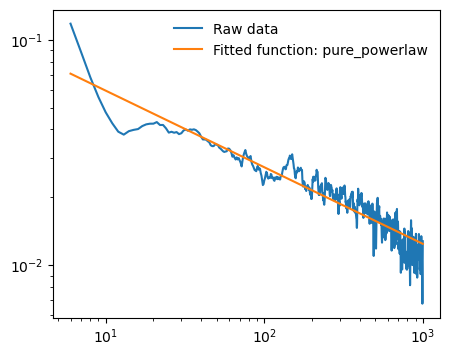

In [24]:
fit.pure_powerlaw.plot_fit(figure_kwargs={'figsize': (5, 4)})

## 3.3. Identify Scaling Range xmin

In [25]:
### Estimate xmin
print(f'TSLA pure_powerlaw xmin: {fit.pure_powerlaw.xmin}')


TSLA pure_powerlaw xmin: 6.0


## 3.4. Estimate alpha

In [26]:
### Estimate alpha
print(f'Alpha found by {fit.pure_powerlaw.fitted_function} using {fit.pure_powerlaw.fitting_method} is: {fit.pure_powerlaw.params.alpha}')

Alpha found by pure_powerlaw using Nonlinear Least-squares is: 0.33949320651748427


## 3.3. Linear fit of pure power law function on loglog

### Observe fitted function

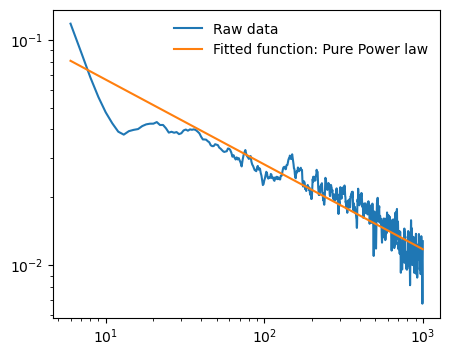

In [28]:
fit.OLS.plot_fit(figure_kwargs={'figsize': (5, 4)})

### Identify Scaling Range xmin

In [29]:
### Estimate xmin
print(f'TSLA pure power law xmin: {fit.OLS.xmin}')

TSLA pure power law xmin: 6.0


### Estimate scaling parameter alpha

In [31]:
### Estimate alpha
print(f'Alpha found by {fit.OLS.fitted_function} using {fit.OLS.fitting_method} is: {fit.OLS.params.alpha}')

Alpha found by Pure Power law using OLS is: 0.3758580855429393


# 4. Measuring long memory through Hurst Exponent

In [ ]:
# Create an instance of HurstEstimator for signs
hurst_signs_acf = HurstEstimator(fit.y_values)

In [ ]:
# alpha
alpha = fit.powerlaw_with_exp_svf.params.alpha

# Estimate Hurst exponent via standard deviation scaling
H, D, data, interpretation = hurst_signs_acf.estimate('generalized_hurst')
print(f"Hurst Estimate via Generalised Hurst: {H}, D constant: {D if D is not None else 'N/A'} ({interpretation})")

# Estimate Hurst exponent using R/S method
H, c, data, interpretation = hurst_signs_acf.estimate('rescaled_range', kind='random_walk')
print(f"Hurst Estimate via R/S: {H}, c constant: {c if c is not None else 'N/A'} ({interpretation})")

# Compute Hurst from alpha
H, _, _, interpretation = hurst_signs_acf.estimate('hurst_from_alpha', alpha=alpha)
print(f"hurst_from_alpha: {H},  Alpha: {alpha}, ({interpretation})")

In [ ]:
# Plot Generalised Hurst vs. Hurst from R/S
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Generalized Hurst
H, D, data, interpretation = hurst_signs_acf.estimate('generalized_hurst', fitting_method='direct_fit')
chunk_sizes, y_values = data
axs[0].plot(chunk_sizes, D*np.array(chunk_sizes)**H, "g--", label=f'Generalized Hurst (H={H:.2f})')
axs[0].plot(chunk_sizes, y_values, 'b.',  label='Observed Values')
axs[0].loglog()
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Standard deviation of sums')
axs[0].legend(frameon=False)
axs[0].grid(False)

# Rescaled Range
H, c, data, interpretation = hurst_signs_acf.estimate('rescaled_range', kind='random_walk')
axs[1].plot(data[0], c*data[0]**H, 'g--', label=f'Hurst (H={H:.2f})')
axs[1].plot(data[0], data[1],  'b.', label='(Lag, R/S value)')
axs[1].loglog()
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('R/S ratio')
axs[1].legend(frameon=False)
axs[1].grid(False)

# Display the figure with the plots
plt.show()


# 5. Goodness of Fit

## 5.1. Individual goodness of fit tests

As we're fitting power law models to autocorrelation function (ACF) data using nonlinear least squares, our problem setup is deterministic, not a probabilistic: Because we're not directly modeling the probability distribution of the data or residuals, traditional statistical approaches like maximum likelihood estimation (MLE) for fitting and Kolmogorov-Smirnov (KS) statistic for assessing the goodness of fit, are not directly applicable as they are generally used for fitting and model comparison in probabilistic contexts. In such a setting, we would be fitting models to data given the need to model the probability distribution of a single variable, not functions to functions (i.e., when we  want to model a response variable as a function of a predictor variable, as in the current context).</b>

As we're interested in finding the best functional form via least squares approximation, which is closer to the realm of approximation theory and deterministic modeling, goodness-of-fit measures like Adjusted R-square, which reflect the quality of the approximation rather than probabilistic prediction, are more suitable for our setting. Here, a higher R-squared may indicate that the model assumptions are more likely to be satisfied when used to assess the goodness-of-fit of a single model to the data.</b>

However, due to potential nonolinear dependencies that may present in the data (While R-squared is often used for linear models, its utility can diminish when dealing with non-linear models or specific types of data and distributions), we caution against lone use of Adjusted R-squared. Therefore, to determine whether the power law can be considered a good/adequate model, we use Adjusted R-squared along with the Bayesian Information Criterion (BIC) computed from the fitted residuals, which are subsequently used for model selection (see below).</b>

Similar to Adjusted R-squared, BIC help to balance the trade-off between goodness-of-fit and model complexity. It takes into account the likelihood of the model (how well the model fits the data) but also penalize more complex models to avoid overfitting. The lower the value BIC the better the fit.

### pure_powerlaw

In [ ]:
print(f'Goodness of fit for {fit.pure_powerlaw.fitted_function}')
print('Alpha:', fit.pure_powerlaw.params.alpha)
print('R-squared:', fit.pure_powerlaw.adjusted_rsquared)
print('BIC:', fit.pure_powerlaw.bic)

### powerlaw_with_exp_svf

In [ ]:
print(f'Goodness of fit for {fit.powerlaw_with_exp_svf.fitted_function}')
print('Alpha:', fit.powerlaw_with_exp_svf.params.alpha)
print('R-squared:', fit.powerlaw_with_exp_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_exp_svf.bic)

### powerlaw_with_log_svf

In [ ]:
print(f'Goodness of fit for {fit.powerlaw_with_log_svf.fitted_function}')
print('Alpha:', fit.powerlaw_with_log_svf.params.alpha)
print('R-squared:', fit.powerlaw_with_log_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_log_svf.bic)

### powerlaw_with_lin_svf

In [ ]:
print(f'Goodness of fit for {fit.powerlaw_with_lin_svf.fitted_function}')
print('Alpha:', fit.powerlaw_with_lin_svf.params.alpha)
print('R-squared:', fit.powerlaw_with_lin_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_lin_svf.bic)

### powerlaw_with_per_svf

In [ ]:
print(f'Goodness of fit for {fit.powerlaw_with_per_svf.fitted_function}')
print('Alpha:', fit.powerlaw_with_per_svf.params.alpha)
print('R-squared:', fit.powerlaw_with_per_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_per_svf.bic)

### linear_fit_ols

In [ ]:
print(f'Goodness of fit for {fit.linear_fit_ols.fitting_method}')
print('Alpha:', fit.linear_fit_ols.params.alpha)
print('R-squared:', fit.linear_fit_ols.adjusted_rsquared)
print('BIC:', fit.linear_fit_ols.bic)

## 5.2. Direct comparison of fitted functions

Note that while BIC can be useful for comparing different models, it doesn't provide a measure of the absolute quality of a model. For instance, a model with a lower AIC or BIC is considered better than a model with a higher value, but this doesn't tell us if either model is actually good or suitable for our data (i.e., the magnitude of BIC itself gives no indication of a direct measure of goodness-of-fit. Following Clauset, Shalizi and Newman (2009), we construct a like-lihood ratio test proposed by Vuong (1989) (LRT) for determinisitc functions. This approach has several attractive features, including the ability to sufficiently distinguish whether some other model might be an equally plausible or even a better explanation as well as the ability to fail to distinguish between the power law and an alternative, for example, in the event of a tie.</b>

### Likelihood Ratio Tests

Whilst Clauset, Shalizi and Newman (2009) primarily focuses on fitting power-law distributions to data and assessing the goodness of fit for those distributions, their methods are not applicable to determinisitc functions (such as ACF with slowly varying functions). In their case traditional statistical approaches like MLE and using the KS-distance used for fitting and statistical goodness-of-fit, respectively, are used for model comparison in probabilistic contexts where authors are fitting known functiona to probablity distirubtions, not functions to functions. In this regard, the authors do not make explicit assumptions about the distribution of residuals because they are dealing directly with probabilistic models (i.e., they assume that the data follows a power-law distribution and fit their models based on that). </b>

To  bridge the gap between deterministic modeling (i.e., in our context, we are interested in fitting a power-law model to ACF data using nonlinear least squares) and probabilistic modeling (i.e., fitting a power-law distribution to data), we assume a distribution for the residuals by evaluating the distribution against competing distributions using loglikiehood and Kolmogorov-Smirnov test). By assuming a distribution for the residuals, we effectively transform our deterministic model into a probabilistic model: We are stating that our observed data is equal to the model's prediction plus some random noise (the residuals), and this random noise follows a certain probability distribution, which allows for statistical hypothesis testing. This makes it possible to compute a significance level to determine whether one model is statistically better than the other, or whether the evidence is not strong enough to favor one model over the other.</b>

Thus, assuming the residuals follow a specific distribution (like a Gaussian), we calculate the log-likelihood of the residuals for each model which enables us to compute the R, loglikelihood ratio between the two candidate distributions, and p, significance value for that direction.

##### R Interpretation

To assess the absolute quality of a model, here we take inspiration from Clauset, Shalizi and Newman (2009) and use Vuong's method to compare the goodness-of-fit between two models, which relies on likelihood ratio tests. Likelihood ratio tests are a powerful statistical tool for model comparison, but they're usually only applicable when one model is a nested version of the other (i.e., the simpler model can be obtained from the more complex model by setting some parameters to specific values). Vuong extends this concept to non-nested models by considering the Kullback-Leibler information criterion, which is a measure of the amount of information lost when a specific model is used to approximate reality. Vuong's method uses this criterion to establish a likelihood ratio test for non-nested models.</b>

R is the loglikelihood ratio between the two candidate distributions. This is a measure of the difference in the fit of the two models. A positive value indicates that the first model (in this case, the one associated with log_likelihood1 or the fitting_func1) is a better fit than the second model (the one associated with log_likelihood2 or the fitting_func2), while a negative value would suggest the opposite. The magnitude of R provides an indication of the extent of the difference.

##### p-value Interpretation:

The p-value used in hypothesis testing helps us decide whether to reject the null hypothesis. The null hypothesis for this test is that the two models are equally good at explaining the data. A small p-value (typically less than 0.05 or 0.1 depending on the chosen significance level) is strong evidence to reject the null hypothesis:

Therefore, if the R value is positive (indicating that the data is more likely under the power-law model), and the p-value is small (indicating that this result is unlikely due to chance), then we would have evidence in favor of the power-law distribution, and we can conclude that the sign of R is statistically significant, indicating a better fit for one model over the other. Conversely, if the R value is negative (indicating that the data is more likely under the alternative distribution), and the p-value is small, then you would have evidence in favor of the alternative distribution. A p-value of 0.0 would indeed suggest that the likelihood that the two models (the power-law function and the alternative function) are equally good is virtually zero. Consequently, this would allow us to firmly reject the null hypothesis given likelihood that the two models are equally good is virtually zero. To summarise:

-  If R > 0 and the p-value is small, this suggests that the power-law model is a significantly better fit for the data than the alternative model.
-  If R < 0 and the p-value is small, this suggests that the alternative model is a significantly better fit for the data than the power-law model.

### powerlaw_with_exp_svf vs. Exponential fit

In [ ]:
# Using best fitted function according to R-squared and BIC - powerlaw_with_exp_svf
print('pure_powerlaw')
print('Alpha:', fit.powerlaw_with_exp_svf.params.alpha)
print('R_sqaured:', fit.powerlaw_with_exp_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_exp_svf.bic)

print()
print('Exponential ')
R, p = fit.function_compare('powerlaw_with_exp_svf', 'exponential_function', nested=True)
print('Lambda:', fit.exponential_function.params.lambda_)
print('R_sqaured:', fit.exponential_function.adjusted_rsquared)
print('BIC:', fit.exponential_function.bic)
print()

print(f'Likelihood Ratio: {R}, p.value: {p}')

In [ ]:
x_values = fit.powerlaw_with_exp_svf.data.xmin_x_values
y_values = fit.powerlaw_with_exp_svf.data.xmin_y_values
powerlaw_fit = fit.powerlaw_with_exp_svf.fitted_values
exponential_fit = fit.exponential_function.fitted_values

# Create plot
plt.figure(figsize=(5, 4))

plt.plot(x_values, y_values, 'b.', label='Empirical data')
plt.plot(x_values, powerlaw_fit, 'g--', label='powerlaw_with_exp_svft')
plt.plot(x_values, exponential_fit, 'r--', label='Exponential fit')
plt.loglog()

plt.title('TSLA Signs ACF: powerlaw_with_exp_svf vs. Exponential fit')
plt.xlabel('Lags')
plt.ylabel(r"$C_\epsilon(\ell)$")
plt.legend(frameon=False)
plt.grid(False)

plt.show()

#### powerlaw_with_exp_svf vs. Logarithmic fit

In [ ]:
print()
print('powerlaw_with_exp_svf:')
print('Alpha:', fit.powerlaw_with_exp_svf.params.alpha)
print('R_sqaured:', fit.powerlaw_with_exp_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_exp_svf.bic)

print()
print('Logarithmic:')
R, p = fit.function_compare('powerlaw_with_exp_svf','logarithmic_function')
print('Beta:', fit.logarithmic_function.params.beta)
print('Lambda:', fit.logarithmic_function.params.lambda_)
print('R_sqaured:', fit.logarithmic_function.adjusted_rsquared)
print('BIC:', fit.logarithmic_function.bic)
print()

print(f'Likelihood Ratio: {R}, p.value: {p}')

In [ ]:
x_values = fit.powerlaw_with_exp_svf.data.xmin_x_values
y_values = fit.powerlaw_with_exp_svf.data.xmin_y_values
powerlaw_fit = fit.powerlaw_with_exp_svf.fitted_values
logarithmic_fit = fit.logarithmic_function.fitted_values

# Create plot
plt.figure(figsize=(5, 4))

plt.plot(x_values, y_values, 'b.', label='Empirical data')
plt.plot(x_values, powerlaw_fit, 'g--', label='powerlaw_with_exp_svft')
plt.plot(x_values, logarithmic_fit, 'r--', label='Logarithmic fit')
plt.loglog()

plt.title('TSLA Signs ACF: powerlaw_with_exp_svf vs. Logarithmic fit')
plt.xlabel('Lags')
plt.ylabel(r"$C_\epsilon(\ell)$")
plt.legend(frameon=False)
plt.grid(False)

plt.show()

### powerlaw_with_exp_svf vs. Linear fit

In [ ]:
print()
print('powerlaw_with_exp_svf:')
print('Alpha:', fit.powerlaw_with_exp_svf.params.alpha)
print('R_sqaured:', fit.powerlaw_with_exp_svf.adjusted_rsquared)
print('BIC:', fit.powerlaw_with_exp_svf.bic)

print()
print('Logarithmic:')
R, p = fit.function_compare('powerlaw_with_exp_svf','linear_function')
print('Beta:', fit.linear_function.params.beta)
print('Lambda:', fit.linear_function.params.lambda_)
print('R_sqaured:', fit.linear_function.adjusted_rsquared)
print('BIC:', fit.linear_function.bic)
print()

print(f'Likelihood Ratio: {R}, p.value: {p}')

In [ ]:
x_values = fit.powerlaw_with_exp_svf.data.xmin_x_values
y_values = fit.powerlaw_with_exp_svf.data.xmin_y_values
powerlaw_fit = fit.powerlaw_with_exp_svf.fitted_values
linear_fit = fit.linear_function.fitted_values

# Create plot
plt.figure(figsize=(5, 4))

plt.plot(x_values, y_values, 'b.', label='Empirical data')
plt.plot(x_values, powerlaw_fit, 'g--', label='powerlaw_with_exp_svft')
plt.plot(x_values, linear_fit, 'r--', label='Linear fit')
plt.loglog()

plt.title('TSLA Signs ACF: powerlaw_with_exp_svf vs. Linear fit')
plt.xlabel('Lags')
plt.ylabel(r"$C_\epsilon(\ell)$")
plt.legend(frameon=False)
plt.grid(False)

plt.show()

## 5.3. Comparing power law fits accross all assets

### 5.3.1. Retrieve all fitted parameters

In [ ]:
# Fit power laws for all stocks and store results
fit_results_all_stocks = []
stock_fits = {}
for stock_name, stock_df in stock_xy_values.items():
    stock_fit = Fit(stock_df, verbose=False)
    stock_fits[stock_name] = stock_fit
    results_df = stock_fit.return_all_fitting_results()
    results_df['stock'] = stock_name
    fit_results_all_stocks.append(results_df)

In [ ]:
all_results_df = pd.concat(fit_results_all_stocks)

In [ ]:
all_results_df.sort_values(['stock', 'bic', 'adjusted r-squared'], ascending=[True, True, False]).reset_index()

In [ ]:
# For each stock what is the power law fit with the highest adjusted R squared
all_results_df.groupby('stock').apply(lambda x: x.loc[(x['adjusted r-squared'] == x['adjusted r-squared'].max()), 'name']).reset_index(level=1, drop=True)

In [ ]:
# For each stock what is the power law fit with the lowest BIC
all_results_df.groupby('stock').apply(lambda x: x.loc[(x['bic'] == x['bic'].min()), 'name']).reset_index(level=1, drop=True)

In [ ]:
all_results_df[all_results_df['name'] == 'powerlaw_with_exp_svf'][['stock', 'xmin', 'fitting param', 'bic']]

### 5.3.2  Comparing power law to alternative functions

### Direct comparison of powerlaw_with_exp_svf vs Others

#### Retrieve fitted parameters for Direct comparison

In [ ]:
def get_exp_comparison_results_for_stock(fit):
    compare_result = {}
    compare_result['powerlaw alpha'] = fit.powerlaw_with_exp_svf.params.alpha
    compare_result['powerlaw r squared'] = fit.powerlaw_with_exp_svf.adjusted_rsquared
    compare_result['powerlaw bic'] = fit.powerlaw_with_exp_svf.bic

    he_signs_acf = HurstEstimator(fit.y_values)
    H, D, data, interpretation = he_signs_acf.estimate('generalized_hurst')
    compare_result['Hurst exponent'] = H

    R, p = fit.function_compare('powerlaw_with_exp_svf', 'exponential_function', nested=True)

    compare_result['exponential lambda'] = fit.exponential_function.params.lambda_
    compare_result['exponential r squared'] = fit.exponential_function.adjusted_rsquared
    compare_result['exponential bic'] = fit.exponential_function.bic

    compare_result['powerlaw vs exp R'] = R
    compare_result['powerlaw vs exp p'] = p

    R, p = fit.function_compare('powerlaw_with_exp_svf', 'logarithmic_function')

    compare_result['logarithmic lambda'] = fit.logarithmic_function.params.lambda_
    compare_result['logarithmic beta'] = fit.logarithmic_function.params.beta
    compare_result['logarithmic r squared'] = fit.logarithmic_function.adjusted_rsquared
    compare_result['logarithmic bic'] = fit.logarithmic_function.bic

    compare_result['powerlaw vs log R'] = R
    compare_result['powerlaw vs log p'] = p

    R, p = fit.function_compare('powerlaw_with_exp_svf', 'linear_function', nested=True)

    compare_result['linear lambda'] = fit.linear_function.params.lambda_
    compare_result['linear beta'] = fit.linear_function.params.beta
    compare_result['linear r squared'] = fit.linear_function.adjusted_rsquared
    compare_result['linear bic'] = fit.linear_function.bic

    compare_result['powerlaw vs lin R'] = R
    compare_result['powerlaw vs lin p'] = p

    return pd.Series(compare_result)

In [ ]:
compare_exp_results = []
for stock_name, stock_fit in stock_fits.items():
    comp_res = get_exp_comparison_results_for_stock(stock_fit)
    comp_res['stock name'] = stock_name
    compare_exp_results.append(comp_res)

In [ ]:
compare_exp_results_df = pd.concat(compare_exp_results, axis=1)
compare_exp_results_df.columns = compare_exp_results_df.loc['stock name']

In [ ]:
compare_exp_results_df

#### Plot fits

In [ ]:
fig, axs = plt.subplots(3, len(stock_fits), figsize=(20, 15))
for i, (stock_name, fit) in enumerate(stock_fits.items()):
    axs[0, i].loglog(fit.x_values, fit.y_values, 'b.')
    axs[0, i].set_title(f'{stock_name} - Empirical data')
    axs[0, i].grid(False)
    if i == 0:
        axs[0, i].set_ylabel('A', size='large', weight='bold')

    x_values = fit.powerlaw_with_exp_svf.data.xmin_x_values
    y_values = fit.powerlaw_with_exp_svf.data.xmin_y_values
    powerlaw_fit = fit.powerlaw_with_exp_svf.fitted_values
    axs[1, i].loglog(x_values, y_values, 'b.')
    axs[1, i].loglog(x_values, powerlaw_fit, 'g--')
    axs[1, i].set_title(f'{stock_name} - Power law fit')
    axs[1, i].grid(False)
    if i == 0:
        axs[1, i].set_ylabel('B', size='large', weight='bold')


    exp_fit = fit.exponential_function.fitted_values
    log_fit = fit.logarithmic_function.fitted_values
    lin_fit = fit.linear_function.fitted_values
    axs[2, i].loglog(x_values, y_values, 'b.')
    axs[2, i].loglog(x_values, powerlaw_fit, 'g--', label='Power law')
    axs[2, i].loglog(x_values, exp_fit, 'y--', label='Exponential')
    axs[2, i].loglog(x_values, log_fit, 'orange', label='Logarithmic')
    axs[2, i].loglog(x_values, lin_fit, 'r--', label='Linear')
    axs[2, i].set_title(f'{stock_name} - Power law vs. others')
    axs[2, i].grid(False)
    axs[2, i].legend(frameon=False)
    if i == 0:
        axs[2, i].set_ylabel('C', size='large', weight='bold')